# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [101]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator

# Start from a simple document
r = requests .get('http://eecs.utk.edu')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

<!DOCTYPE	1
PUBLIC	1
"-//IETF//DTD	1
2.0//EN">	1
<html><head>	1
<title>403	1
Forbidden</title>	1
</head><body>	1
<h1>Forbidden</h1>	1
<p>You	1
don't	1
have	1
permission	1
to	1


### Example 2

Lots of markup in the output, lets remove it --- 

use BeautifulSoup and nltk modules and practice some regular expressions.

In [102]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')

In [105]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

#plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')

In [103]:
#In case Project gutenberg is blocked you can download text to your laptop and copy to the docker container via scp
#Assuming the file name you copy is pg4680.txt here is how you change the script
# Please note the option errors='replace'
# without it python invariably runs into unicode errors
f = open ('pg4680.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP stuff, get just the body of the response
t = f.read()

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

and	2836
of	2676
to	2646
a	2217
in	1422
his	1205
he	928
that	920
was	823
for	798
with	797
as	672
I	505
you	497


# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [5]:
import requests, re, nltk
#In case your text is not on Project Gutenberg but at some other URL
#http://www.fullbooks.com/Our-World-or-The-Slaveholders-Daughter2.html
# that contains 12 parts
t = ""
for i in range(2,13):
  r = requests .get('http://www.fullbooks.com/Our-World-or-The-Slaveholders-Daughter' + str(i) + '.html')
  t = t + r.text

In [23]:
len(t)

1323653

# Miniproject 1
**Name:** Elijah Berberette

# Install Necessary Packages
**Description:** I used a few external packages for my project to capture some data information.

**Sources:**
pytickersymbols - https://pypi.org/project/pytickersymbols/

In [9]:
#Install Packages
%pip install pytickersymbols

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 19.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=403d677a09cf2ab0bde9e4d5bd600e181cbd81368419ebeda6452dc1ca20b4d5
  Stored in directory: /home/elidberb/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13486 sha256=69f70dc9502855a314e48a23b9d3225800c0db383b2bb469e712049477cdbbe8
  Stored 

# Create an access token

**Description**: This cell handles setting up an access token with Reddit's API, so that I can gather posts, comments, and other information from Reddit. I have replaced my personal information with placeholder's for privacy. If you would like to use this cell, please go to https://www.reddit.com/prefs/apps, and create an application. More information on how to do this can be found at https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c.

In [ ]:
# import requests

# #Create a variable with the authorization information for your application.
# auth = requests.auth.HTTPBasicAuth('<secret>', '<personal_use_script>')

# # Create a variable with your user credentials
# data = {'grant_type': 'password',
#         'username': '<reddit_username>',
#         'password': '<reddit_password>'}

# # Headers includes the application you would like to use and other important information
# headers = {'User-Agent': '<name_of_application>'}

# # Post request for an OAuth token
# res = requests.post('https://www.reddit.com/api/v1/access_token',
#                     auth=auth, data=data, headers=headers)

# #Print information related to your access token in JSON format
# print(res.json())

# # Get your bearer access token
# TOKEN = res.json()['access_token']

# # add bearer token to our headers dictionary
# headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}
# requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

# Get posts from WallStreetBets
**Description**: This cell handles gathering the most recent posts from the subreddit WallStreetBets. I do not provide a limit in the request, so the response returns 25 posts in this request. This can be raised to a maximum of 100, as shown below. **Please note that I have commented out the print statement, and I have not shown the result for privacy purposes because I was not sure if the JSON contained any private information.** Feel free to uncomment the statement and run the cell locally to test and see the results.

In [232]:
#Single GET request for posts in WallStreetBets
response = requests.get("https://oauth.reddit.com/r/wallstreetbets/new",
                   headers=headers)

#Show the results from a single response
#print(response.json())

# Converting the response to a Pandas DataFrame
**Description:** This cell contains the function `ResultToDataFrame()` which handles converting the messy JSON returned from the endpoint to a Pandas dataframe with only the information that I care about.

**Work Cited:** https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c

In [170]:
import pandas as pd
from datetime import datetime
# loop through each post retrieved from GET request
def ResultToDataFrame(result):
    totals_df = pd.DataFrame()  # initialize dataframe
    row_df = pd.DataFrame()
    
    #Loop through each post's information in the JSON and save relevant info
    for i,post in enumerate(result.json()['data']['children']):
        # concat relevant data to dataframe
        row_df = pd.DataFrame({
            'subreddit': post['data']['subreddit'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'created_utc': datetime.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
            'id': post['data']['id'],
            'kind': post['kind']
        }, index=[i])
        totals_df = pd.concat([totals_df, row_df])

    return totals_df

# Ratelimit Awareness
**Description:** It is important to pay attention to the number of requests that you have made. Reddit allows users that use the API to make 600 requests every 10 minutes (1 request/sec). This cell contains the function `print_ratelimit` which gives the user information about how many requests they have used and how many requests they can make in the remaining time for that given 10-minute period.

**Work Cited**: https://gist.github.com/andrewjbennett/0267c0599a4a839209781bae8877379e -- This link is a bit out-of-date, so just keep that in mind.

In [171]:
#Takes in your response object and parses the headers for ratelimit information
def print_ratelimit(response):
    #Variables that are acquired from parsing the reponse header information
    requests_remaining = response.headers["x-ratelimit-remaining"]
    request_limit = float(response.headers["x-ratelimit-remaining"]) + float(response.headers['x-ratelimit-used'])
    reset = int(response.headers["x-ratelimit-reset"])
    requests_used = response.headers['x-ratelimit-used']
    
    #Handles parsing the seconds left and writes it in minute:second format
    mins_left, secs_left = divmod(reset, 60)#, ratelimit["reset"]
    
    #Prints information for the user
    print(f"You have used {requests_used}.0 request.")
    print("You have %s out of %s remaining requests left.\nThis resets in %d:%02d\n" % (requests_remaining, request_limit, mins_left, secs_left))

# Test the RateLimit Information Cell
**Description:** Assuming that you have made a single request to Reddit's API, you will see the following information:

In [233]:
print_ratelimit(response)

You have used 1.0 request.
You have 599.0 out of 600.0 remaining requests left.
This resets in 6:09



# Create a list of Stock Symbols (Tickers)
**Description:** This was the best way I could find to capture a list of publically traded stock symbols. A stock symbol is a set of letters that represents a particular stock. It is possible that there are other stock mentioned in posts, titles, and comments; however, this captures the majority. 

**Work Cited:** https://pypi.org/project/pytickersymbols/

In [166]:
from pytickersymbols import PyTickerSymbols

#Use external library and declare variables
stock_data = PyTickerSymbols()
all_stocks = stock_data.get_all_stocks()
stocks_df = pd.DataFrame(all_stocks)
list_of_stocks = []

print(f"There are {len(all_stocks)} stocks in the list of stocks")
display(stocks_df.head())


#Iterate through all stocks and append symbol to a list
for i in all_stocks:
    list_of_stocks.append(i['symbol'])

print(f"Here is the first 10 Symbols: {list_of_stocks[:10]}")

There are 1230 in the list of stock


,name,symbol,country,indices,industries,symbols,metadata,isins,wiki_name
0,adidas AG,ADS,Germany,"[DAX, EURO STOXX 50]","[Cyclical Consumer Products, Footwear, Textile...","[{'yahoo': 'ADS.F', 'google': 'FRA:ADS', 'curr...","{'founded': 1924, 'employees': 57016}",[DE000A1EWWW0],NaN
1,Allianz SE,ALV,Germany,"[DAX, EURO STOXX 50]","[Insurance, Financials, Multiline Insurance & ...","[{'yahoo': 'ALV.F', 'google': 'FRA:ALV', 'curr...","{'founded': 1890, 'employees': 147268}",[DE0008404005],NaN
2,BASF SE,BAS,Germany,"[DAX, EURO STOXX 50]","[Diversified Chemicals, Basic Materials, Chemi...","[{'yahoo': 'BAS.F', 'google': 'FRA:BAS', 'curr...","{'founded': 1865, 'employees': 117628}",[DE000BASF111],NaN
3,Bayer AG,BAYN,Germany,"[DAX, EURO STOXX 50]","[Pharmaceuticals, Pharmaceuticals & Medical Re...","[{'yahoo': 'BAYN.F', 'google': 'FRA:BAYN', 'cu...","{'founded': 1863, 'employees': 103824}",[DE000BAY0017],NaN
4,Beiersdorf AG,BEI,Germany,[DAX],"[Consumer Non-Cyclicals, Personal Products, Pe...","[{'yahoo': 'BEI.F', 'google': 'FRA:BEI', 'curr...","{'founded': 1882, 'employees': 20306}",[DE0005200000],NaN


Here is the first 10 Symbols: ['ADS', 'ALV', 'BAS', 'BAYN', 'BEI', 'BMW', 'CON', '1COV', 'DAI', 'DBK']


# Gathering all the posts from a Subreddit
**Description:** `gather_data_from_subreddit` takes two arguments `subreddit` and `category` and returns a Pandas DataFrame with the compilation of posts gathered from multiple requests to the subreddit API (https://www.reddit.com/dev/api/). I was only able to gather about ~900 posts from the "new" category within each subreddit, ~300 posts from the "hot" category, and ~20-100 posts from the "top" category. This is because Reddit only allows you to get the 1000th post within a subreddit (https://www.reddit.com/r/redditdev/comments/d4w65t/why_cant_i_access_any_post_past_the_1000th_post/). I might use a 3rd party service like https://pushshift.io/ to gather more posts; however, I did not think it was necessary for this project. I was able to gather enough data to make some interesting analysis.

**Work Cited:** https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c -- Please note that I used this as a reference to make multiple requests, but changed it to match my needs.

In [201]:
import time

'''
    Takes a subreddit and category (top, hot, new),
    produces a csv, and returns a pandas DataFrame, final post name,
    and final date
'''
def gather_data_from_subreddit(subreddit, category):
    #Sets the limit to 100, so that I can get 100 posts in each request
    params = {'limit': 100}
    
    save_last_post = ""
    save_date = ""
    
    #Creates two dataframes and save variables
    All_Posts_df = pd.DataFrame()
    new_df = pd.DataFrame()

    #Loop until the response doesn't return values
    while(new_df.shape[0] > 0 or All_Posts_df.shape[0] == 0):
        
        # make a request to the subreddit fed through the arguments, sorting by the category
        res = requests.get(f"https://oauth.reddit.com/r/{subreddit}/{category}",
                           headers=headers,
                           params=params)

        # Feed the response to our function defined above, and get the DataFrame
        new_df = ResultToDataFrame(res)
        
        #If the DataFrame is empty, break from the loop
        if(not len(new_df) > 0):
            break

        # Get the last row from the dataframe
        last_row = new_df.iloc[len(new_df)-1]

        #This is used to make a request for the information after our last post
        last_post = last_row['kind'] + '_' + last_row['id']

        #For saving the last post captured and its corresponding date
        save_last_post = last_post
        save_date = f"{last_row['created_utc']}"

        # update params for new api call
        params['after'] = last_post

        #Concat DataFrame created from api to the dataframe with all the current posts
        All_Posts_df = pd.concat([All_Posts_df, new_df])

        #Print the shape to give users updates on how many posts have been grabbed
        print(f"Grabbed {All_Posts_df.shape[0]} Posts")
        
    #Make a CSV with a name based on the size, category, and subreddit
    All_Posts_df.to_csv(f'{All_Posts_df.shape[0]}_{category}_Posts_From_{subreddit}.csv', encoding='utf-8')
    return All_Posts_df, save_last_post, save_date

# Example of data from r/Stocks


In [202]:
returned_df, final_post, final_date = gather_data_from_subreddit("Stocks", "new")
returned_df.head(5)

Grabbed 100 Posts
Grabbed 200 Posts
Grabbed 300 Posts
Grabbed 400 Posts
Grabbed 500 Posts
Grabbed 600 Posts
Grabbed 700 Posts
Grabbed 800 Posts
Grabbed 900 Posts
Grabbed 938 Posts


,subreddit,title,selftext,upvote_ratio,ups,downs,score,created_utc,id,kind
0,stocks,Advice On how to gain back loses of $1000 on N...,My mom ran the account mainly however we both ...,1.00,1,0,1,2022-09-13T03:18:45Z,xcwjoa,t3
1,stocks,Is the “rule of 20” valuation model dead/outda...,\nI work at a FX trading desk at a multination...,0.82,10,0,10,2022-09-13T00:25:24Z,xcsubz,t3
2,stocks,Arista Networks: Underrated or misunderstood c...,Arista Networks is something I haven't really ...,0.75,12,0,12,2022-09-12T22:17:37Z,xcpy6i,t3
3,stocks,Does FOMC see CPI data same time as everyone e...,Fed clearly signaled through Timiraos (WSJ) la...,0.87,34,0,34,2022-09-12T19:16:52Z,xcli7h,t3
4,stocks,Google Finance color codes,Has anybody been able to crack the code (or fi...,0.60,2,0,2,2022-09-12T17:52:10Z,xcjfcl,t3


# Show the last post captured
**Description:** This gives us a sense of range for how far back the posts go. The following information refers to the example captured above, which we can see, goes back about a week. 

In [204]:
print(f"The last post grabbed was {final_post}")
print(f"This post was posted on Reddit on {final_date}")


The last post grabbed was t3_wlszzi
This post was posted on Reddit on 2022-08-11T14:38:40Z


# Stop words given by Dr. Mockus

In [316]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Defines a function for counting words and stock ticker occurences
**Description:** This function returns two dictionaries. The first dictionary holds the number of time common words are seen throughout the information. The second holds the number of times particular stock tickers are mentioned in the information

In [222]:
import math
import requests, re
import operator
import pandas as pd
#DataFrame read from csv

def count_words_and_stocks(filename, column, num_of_common_words): 
    hot_df = pd.read_csv(filename)
    stop_words = nltk.corpus.stopwords.words('english') + [
     'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
     '\"', '-', '}', '{', '&', '|', u'\u2014', '*' ]
    
    #Declare dictionaries
    wf = {}
    stock_dict = {}
    
    #Iterate through datafram
    for row in hot_df[column]:
        row = str(row)
        
        #If the row is now empty, none, or a report
        if len(row) != 0 and row != "nan" and "**User Report**" not in row:
            wds = re.split('\s+', row)
            
            #Iterate through each of the words and do operations
            for w in wds:
                
                #Removes junk
                if "*" in w:
                    continue
                
                #Check to see if the word is a ticker and not the letter A or talking about AI
                if w in list_of_stocks and w != "A" and w != "AI":
                    if w in stock_dict: stock_dict [w] = stock_dict [w] + 1
                    else:  stock_dict[w] = 1
                
                #Add the common word to our word frequency dictionary
                if not w.lower() in stop_words:
                    if w in wf: wf [w] = wf [w] + 1
                    else:  wf[w] = 1
    
    #Used Dr. Mockus's method for getting a sorted list       
    wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
    ml = min(len(wfs),num_of_common_words)
    stock_dict_sorted = sorted (stock_dict .items(), key = operator .itemgetter (1), reverse=True)
    m2 = min(len(stock_dict_sorted),6)
    word_frequencies_sorted = wfs [ 1:ml ][::-1]
    stock_frequencies_sorted = stock_dict_sorted [ 0:m2 ][::-1]
    return word_frequencies_sorted, stock_frequencies_sorted
    


# Part one: 
**Description:** Compare word frequencies between two works of a single author.

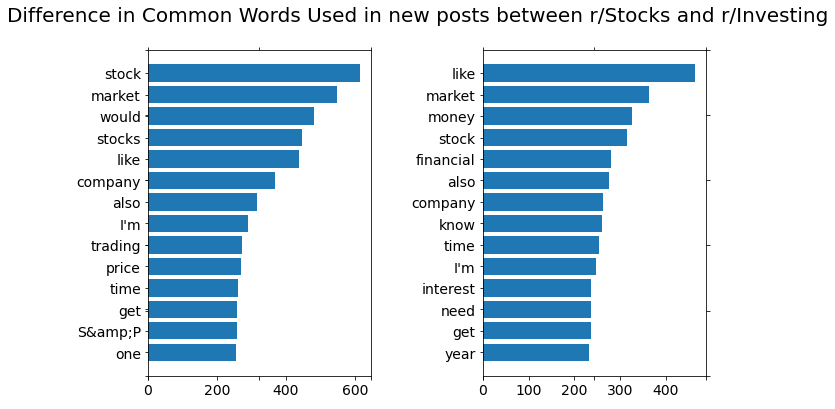

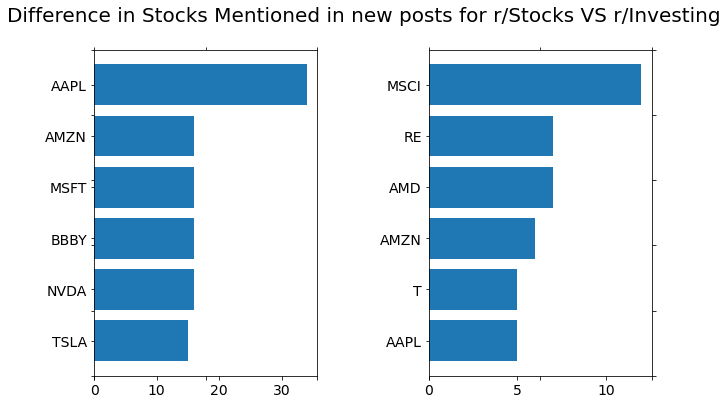

In [210]:
words_for_new_rStocks, stocks_for_new_rStocks = count_words_and_stocks('943_new_Posts_From_Stocks.csv','selftext', 15)
words_for_new_rInvesting, stocks_for_new_rInvesting = count_words_and_stocks('926_new_Posts_From_Investing.csv', 'selftext', 15)

plotTwoLists (words_for_new_rStocks, words_for_new_rInvesting, 'Difference in Common Words Used in new posts between r/Stocks and r/Investing')
plotTwoLists (stocks_for_new_rStocks, stocks_for_new_rInvesting, 'Difference in Stocks Mentioned in new posts for r/Stocks VS r/Investing')

# Part Two: 
**Description:** Compare word frequencies between works of two authors.

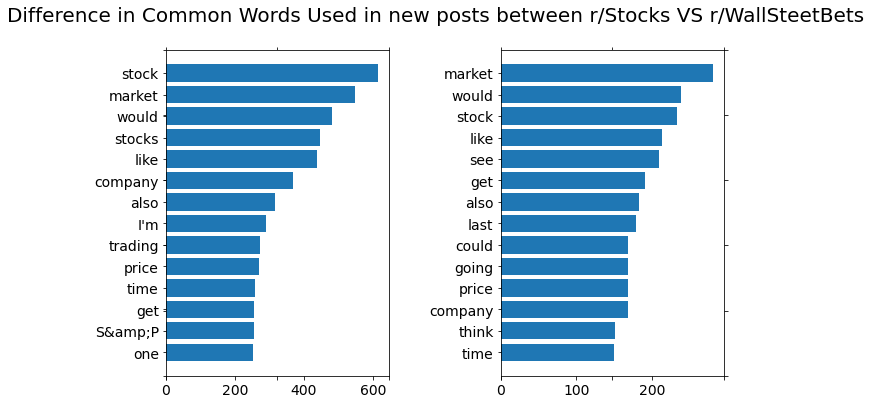

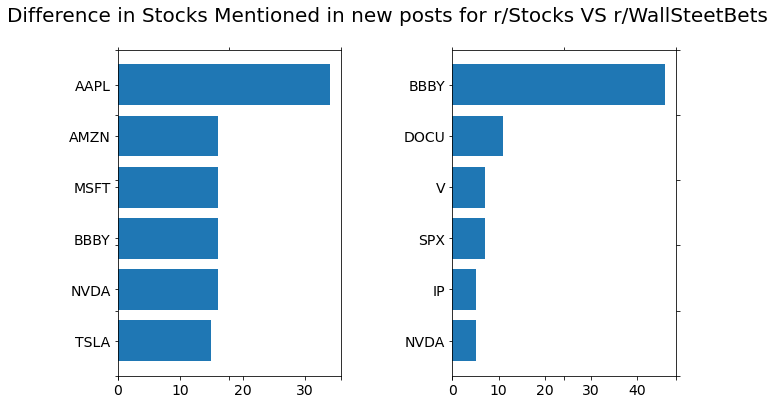

In [223]:
words_for_new_rStocks, stocks_for_new_rStocks = count_words_and_stocks('943_new_Posts_From_Stocks.csv','selftext', 15)
words_for_new_rWallStreetBets, stocks_for_new_rWallStreetBets = count_words_and_stocks('935_new_Posts_From_WallSteetBets.csv', 'selftext', 15)

plotTwoLists (words_for_new_rStocks, words_for_new_rWallStreetBets, 'Difference in Common Words Used in new posts between r/Stocks VS r/WallSteetBets')
plotTwoLists (stocks_for_new_rStocks, stocks_for_new_rWallStreetBets, 'Difference in Stocks Mentioned in new posts for r/Stocks VS r/WallSteetBets')

# Part 3
**Description:** Are there some words preferred by one author but used less frequently by another author?

**Answer:** From simple observation, we can see the stock BBBY is mentioned much more frequently in r/WallStreetBets than it is in r/Stocks. This is because options trading is much more popular in r/WallStreetBets, and due to the fact that these posts only go back about a week and the BBBY news is still relevant, this is still a popular discussed stock for r/WallStreetBets. Many of the common words used are similar between the two subreddits; however, if we expand the bar chart to more than 15 words, we can see that "company", "since", and "last" is used much more in r/Stocks than r/WallStreetBets. This could be because r/stocks is analyzing history, so it talks about information "since" last analyzed or potentially "last" earnings. I have captured this below. (I saw "shorts", "calls", and "puts" was used more in r/WallStreetBets, but I could not create a clean chart to display this finding.)

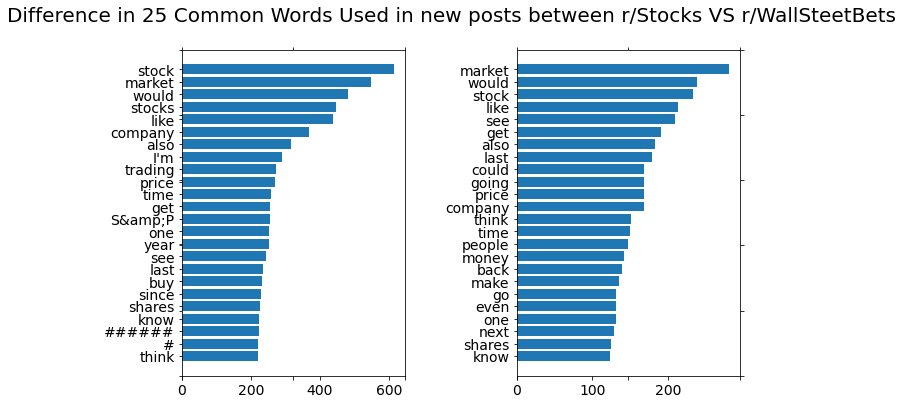

In [224]:
words_for_new_rStocks, stocks_for_new_rStocks = count_words_and_stocks('943_new_Posts_From_Stocks.csv','selftext', 25)
words_for_new_rWallStreetBets, stocks_for_new_rWallStreetBets = count_words_and_stocks('935_new_Posts_From_WallSteetBets.csv', 'selftext', 25)

plotTwoLists (words_for_new_rStocks, words_for_new_rWallStreetBets, 'Difference in 25 Common Words Used in new posts between r/Stocks VS r/WallSteetBets')

# Extra Analysis
**Description:** I wanted to analyze the comments from the "hot" posts to see what common words and stocks are talked about the most. The function used to capture this data is below the results. The results are shown below:

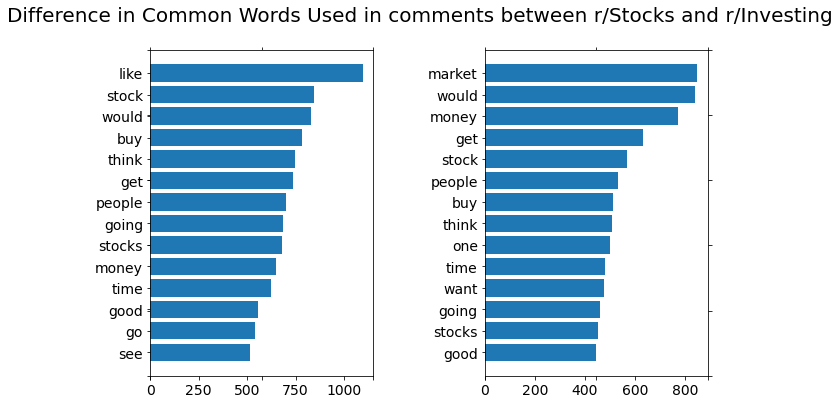

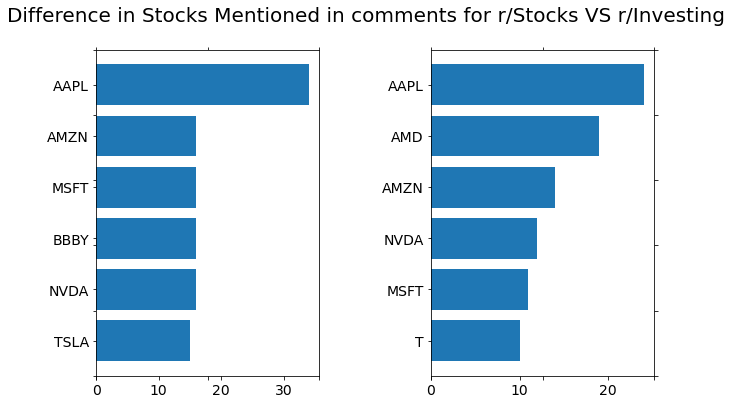

In [225]:
words_for_new_rStocks, stocks_for_new_rStocks_comments = count_words_and_stocks('7721_comments_From_386_stocks_Posts.csv','0', 15)
words_for_new_rInvesting, stocks_for_new_rInvesting = count_words_and_stocks('4805_comments_From_307_investing_Posts.csv', '0', 15)

plotTwoLists (words_for_new_rStocks, words_for_new_rInvesting, 'Difference in Common Words Used in comments between r/Stocks and r/Investing')
plotTwoLists (stocks_for_new_rStocks, stocks_for_new_rInvesting, 'Difference in Stocks Mentioned in comments for r/Stocks VS r/Investing')

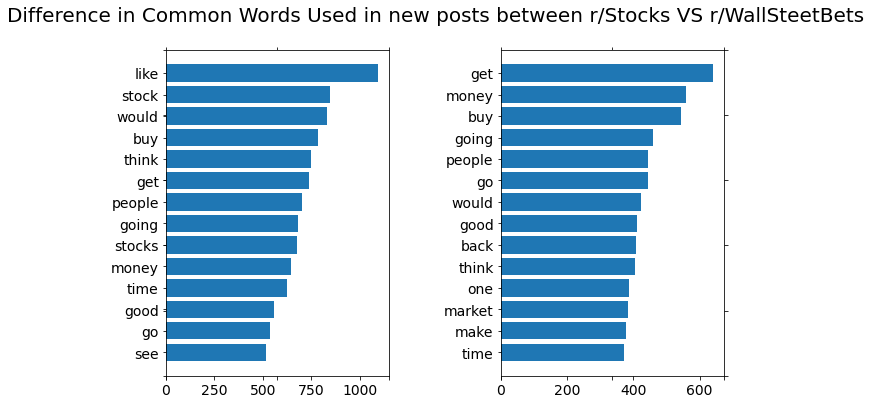

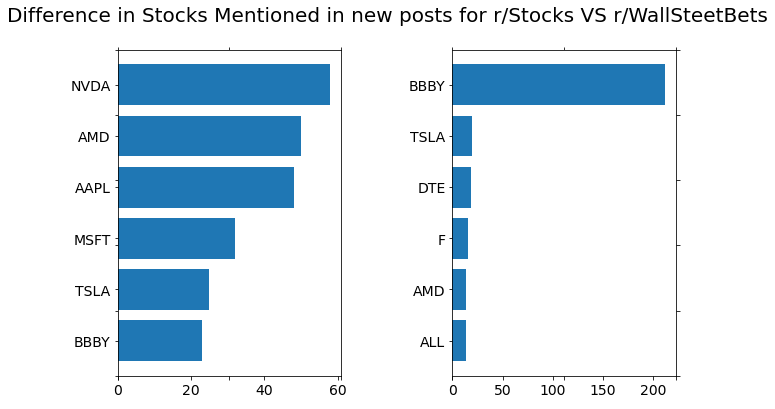

In [227]:
words_for_new_rStocks, stocks_for_new_rStocks = count_words_and_stocks('7721_comments_From_386_stocks_Posts.csv','0', 15)
words_for_new_rInvesting, stocks_for_new_rInvesting = count_words_and_stocks('Over_14583_comments_From_484_WallStreetBets_Posts.csv', '0', 15)

plotTwoLists (words_for_new_rStocks, words_for_new_rInvesting, 'Difference in Common Words Used in new posts between r/Stocks VS r/WallSteetBets')
plotTwoLists (stocks_for_new_rStocks, stocks_for_new_rInvesting, 'Difference in Stocks Mentioned in new posts for r/Stocks VS r/WallSteetBets')

In [144]:
res_comments = requests.get("https://oauth.reddit.com/r/wallstreetbets/comments/xabtpz/",
                   headers=headers)

#print(res_comments.json()) 
#d = ResultToDataframe(res_comments)



# Capturing the comments for a CSV of posts
**Description:** I wanted to capture the words used in comments because I believe that they are equally valuable to the posts themselves. This process was difficult because of the tree structure that Reddit has; however, this function captures the main comments from each post within a post. Please keep in mind that this creates a request for each post, so you will run through your request usage much faster than gathering the posts themselves. For example, gathering the comments for a file with 100 posts creates 100 requests. I have used my rate limit function defined above to give updates on how many requests the user has used every 10 posts. **(Also, please note that comments on Reddit tend to be vulgar and contain sensitive information)**

In [230]:
import json
def get_comments(filename, subreddit):
    #Create a list to hold the comments
    list_of_comments = []
    
    #Create a dataframe from the CSV we want the comments from
    hot_df = pd.read_csv(filename)
    
    #Iterate through the 'id' which is the reddit post id
    for num,i in enumerate(hot_df['id']):
        
        #Every 10 iterations give an update
        if num % 10 == 0 and num != 0:
            print(f"On {num}")       
            print(f"Total Comments {len(list_of_comments)}")
            print_ratelimit(res_comments)
        
        #Make an API request to the posts comments section (Read Reddit's API doc for more info)
        res_comments = requests.get(f"https://oauth.reddit.com/r/{subreddit}/comments/{i}/",
                       headers=headers)
        
        #Iterates through the comments tree and gathers important information
        for i in res_comments.json():
            for j in i['data']['children']:
                if 'body' in j['data']:            
                    list_of_comments.append(j['data']['body'])
                    
    #Create a dataframe and write it to a CSV file
    list_to_df = pd.DataFrame(list_of_comments)
    list_to_df.to_csv(f'{len(list_of_comments)}_comments_From_{filename}.csv', encoding='utf-8')

# Gather all of the comments from the hot category within r/Stocks

In [231]:
get_comments("386_hot_Posts_From_Stocks.csv","stocks")

On 10
Total Comments 310
You have used 10.0 request.
You have 590.0 out of 600.0 remaining requests left.
This resets in 5:39

On 20
Total Comments 498
You have used 20.0 request.
You have 580.0 out of 600.0 remaining requests left.
This resets in 5:35

On 30
Total Comments 707
You have used 30.0 request.
You have 570.0 out of 600.0 remaining requests left.
This resets in 5:31

On 40
Total Comments 965
You have used 40.0 request.
You have 560.0 out of 600.0 remaining requests left.
This resets in 5:26

On 50
Total Comments 1151
You have used 50.0 request.
You have 550.0 out of 600.0 remaining requests left.
This resets in 5:22

On 60
Total Comments 1328
You have used 60.0 request.
You have 540.0 out of 600.0 remaining requests left.
This resets in 5:18

On 70
Total Comments 1593
You have used 70.0 request.
You have 530.0 out of 600.0 remaining requests left.
This resets in 5:12

On 80
Total Comments 1850
You have used 80.0 request.
You have 520.0 out of 600.0 remaining requests left.
T

In [148]:
#print(len(my_list))
list_to_df = pd.DataFrame(my_list)
#print(list_to_df.head())
list_to_df.to_csv('7721_comments_From_386_stocks_Posts.csv', encoding='utf-8')

# Problems that I ran into:

- My response was returning with no values because my password was incorrect, so I had to reset my password
- Ratelimits
- Reddit API will only allow users to go back around 1000 posts
- Comments JSON file structure
- Images being used within the selftext instead of text. This could potentially be solved using OCR in the future, but I did not believe it was necessary for this project

# Future Work
- I really wanted to create the data scraper from scratch; however, I would probably test PRAW (package for gathering Reddit posts) in the future.
- I would like to gather more than 1,000 posts in the future, so the use of an external data storage like https://pushshift.io/ would be cool to research

# Useful links and Work Cited
- Information about PRAW: https://towardsdatascience.com/scraping-reddit-data-1c0af3040768
- Creating your own data scraper: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
- Creating an app for scraping Reddit posts: https://www.reddit.com/prefs/apps
- Dictionaries don't use append anymore?: https://stackoverflow.com/questions/70837397/good-alternative-to-pandas-append-method-now-that-it-is-being-deprecated
- Gathering comments: https://www.reddit.com/r/redditdev/comments/cdio0t/get_comments_with_json_in_subreddit_url/
- API documentation specifically for gathering comments: https://www.reddit.com/dev/api/#GET_comments_{article}
- Ratelimit information: https://www.reddit.com/r/redditdev/comments/1yxrp7/formal_ratelimiting_headers/
- Gist for getting ratelimit information (out-of-date): https://gist.github.com/andrewjbennett/0267c0599a4a839209781bae8877379e
- Pretty printing JSON: https://www.digitalocean.com/community/tutorials/python-pretty-print-json
- DataFrame to CSV: https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03,https://www.w3schools.com/python/pandas/pandas_csv.asp 
- Accessing posts past 1000: https://www.reddit.com/r/redditdev/comments/d4w65t/why_cant_i_access_any_post_past_the_1000th_post/
- Getting a list of stock tickers: ypi.org/project/pytickersymbols/
